# CHALLENGE DE TEXT MINNING #
## TRABAJO PYTHON ##
#### JAVIER CONDON, ALVARO MURO Y RUBEN SAN JOSE ####

### INSTALAMOS LIBRERIAS ###
Aquí tenemos las librerias que vamos a utilizar en todo el trabajo y ya se explicarán a su debido tiempo

In [1]:
#Instalamos las librerias

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import regex as re
import io
from datetime import datetime
import tkinter as tk
from tkinter import filedialog
import json
import os


## EXPORTAMOS EL DICCIONARIO EN CADA FACTURA EN ARCHIVO TXT PARA PODER VISUALIZAR MEJOR SUS DATOS ##


In [2]:
#EXPORTAR DICCIONARIO EN ARCHIVOS TXT

with open("./dict_wB.json", 'r') as fp:                         #Abrimos el archivo .json y lo guardamos en un diccionario
    data = json. load(fp)

filepath = "./facturas/"                                        #Creamos el directorio ./facturas/
try:
    os.mkdir(filepath)                                          #creamos la carpeta facturas, donde irán nuestros txt
except OSError:                                                 #Si la carpeta ya está creada nos avisa el programa
    print("Carpeta ya creada de antes")
else:
    print("Carpeta creada desde cero")

for nombre, valor in data.items():                              #Creamos cada txt en función de su nombre y su contenido     
    with open(filepath+nombre+".txt", "w") as facturaarchivo:   #Creamos un txt vacío con su nombre
        facturaarchivo.write("%s %s\n" %(nombre, valor))        #Escribimos en él, el contenido

Carpeta ya creada de antes


## FUNCIONES NECESARIAS PARA CREAR EL DATAFRAME ##

In [3]:
#### FUNCIONES NECESARIAS PARA HACER EL DATAFRAME###

#------------------------------------------------Funcion Simplify------------------------------------------------

def simplify(captura):                                      #Captura es la lista que tengamos después de hacer la regular expresion
    dimension = len(captura) - 1                            #Nos guardamos su dimensión
    if (dimension < 0):                                     #Si es menor que 0, ponemos Na
        dimension = 0
        captura = "Na"
    else:                                                   #Sino comparamos todas sus casillas para ver si hay casillas repetidas
        for x in range(dimension):
            if (captura[x] == captura[x+1]):
                del(captura[x+1])                           #Si hay casillas repetidas se eliminan con del()
        captura = " | ".join(captura)                       #Luego se juntan el resto de casillas con .join()
    return captura

   #------------------------------------------------Buscar fecha------------------------------------------------

def fecha(leer_factura):
    
    leer_factura2 = re.sub(r'\n', '',leer_factura)
    leer_factura_upper = leer_factura2.upper()              #Se transforma el txt en mayuscula y todo en una linea para una mejor busqueda de fechas
    
    xfecha=re.findall("((?:(?:0?[1-9]|1[0-9]|2[0-9]|3[0-1])(?:\/|-|\s)(?:0?[1-9]|1[0-2])(?:\/|-|\s)(?:201[0-9]|202[0-1]))|(?:(?:0?[1-9]|1[0-9]|2[0-9]|3[0-1])(?:\/|-|\s)(?:DE)?(?:\/|-|\s)?(?:ENE\.?|ENERO|FEB\.?|FEBRERO|MAR\.?|MARZO|ABR\.?|ABRIL|MAYO\.?|MAY|JUNIO\.?|JUN|JULIO\.?|JUL|AGOSTO\.?|AGO|SEPTIEMBRE\.?|SEP|OCTUBRE\.?|OCT|NOVIEMBRE\.?|NOV|DICIEMBRE\?.|DIC)(?:\/|-|\s)?(?:DE)?(?:\/|-|\s)(?:(?:20)?1[0-9]|(?:20)?2[0-1])))",leer_factura_upper)
        
    xfecha = simplify(xfecha)                               #Hacemos la función simplify
    xfecha = re.sub(" DE ","/",xfecha)                      #Cambiamos DE por /
    xfecha = re.sub("-","/",xfecha)                         #Cambiamos - por /

                                                            #Ponemos todo al mismo formato: ejemplo 01/12/2020

    meses = ["ENERO","FEBRERO","MARZO","ABRIL","MAYO","JUNIO","JULIO","AGOSTO","SEPTIEMBRE","OCTUBRE","NOVIEMBRE","DICIEMBRE"]
    mesesabreviados = ["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SET","OCT","NOV","DIC"]
    mesesabreviados2 = [" ENE. "," FEB. "," MAR. "," ABR. "," MAY. "," JUN. "," JUL. "," AGO. "," SET. "," OCT. "," NOV. "," DIC. "]

    mesesnumero = ["01","02","03","04","05","06","07","08","09","10","11","12"]
    mesesnumeroconbarra = ["/01/","/02/","/03/","/04/","/05/","/06/","/07/","/08/","/09/","/10/","/11/","/12/"]
    k = 0
    for k in [0,1,2,3,4,5,6,7,8,9,10,11]:
        xfecha = re.sub(meses[k],mesesnumero[k],xfecha)
        xfecha = re.sub(mesesabreviados2[k],mesesnumeroconbarra[k],xfecha)
        xfecha = re.sub(mesesabreviados[k],mesesnumero[k],xfecha)

    return xfecha

#------------------------------------------------Buscar nombre de la empresa------------------------------------------------

def nombreempresa(leer_factura):

    xnombreempresa=re.findall("(?:Remite.\s|Remite:\s|Entidad:\s)?([A-Z][a-z]^\s|\n?.+OASIS|[A-Z].*,?\s?(?:S\.L\.|[^a-z-A-Z^\n?]SL|S\.L|C\.B|Inc\.|[^a-z-A-Z^\n]SAU|S\.A\.U\.|S\.A\.U|S\.A\.|[^a-z-A-Z^\.^\n?]SA(?=\n)|S\.A))",leer_factura)

    xnombreempresa = simplify(xnombreempresa)                               #Hacemos la función simplify
    return xnombreempresa

#------------------------------------------------Buscar numero de factura------------------------------------------------

def numerofactura(leer_factura):

    xnumerofactura=re.findall("((?:(?<=Comp. Nro: ).*)|(?:(?<=Factura: ).*)|(?:(?<=SU PEDIDO\n)[^A-Z].*)|(?:(?<=N° FACTURA: F\/).*)|(?:(?<=EXPEDIENTE N°).*)|(?:(?<=Numero: ).*)|(?:(?<=N° de factura\n).*)|(?:(?<=N° DE FACTURA\n).*)|(?:(?<=Número de factura ).*)|(?:(?<=N° FACTURA : ).*)|(?:(?<=Póliza: ).*)|(?:(?<=Código\n).*)|(?:(?<=N° fra.simp: ).*)|(?:(?<=NÚMERO\n).*)|(?:(?<=FACTURA SIMPLIFICADA #).*)|(?:(?<=01\/03\/16\n).*)|(?:(?<=Número de póliza del contrato de acceso ).*))",leer_factura)
    xnumerofactura = simplify(xnumerofactura)                               #Hacemos la función simplify
    return xnumerofactura
#------------------------------------------------Buscar NIF/CIF------------------------------------------------

def nif(leer_factura):

    xnif=re.findall("\s(?:ES)?(\d{8}[\s-]?[A-Z]|\d{10}[\s-]?[A-Z]|[A-Z][\s-]?\d{8}|[A-Z][\s-]?\d{10})\s",leer_factura)
    xnif = simplify(xnif)                               #Hacemos la función simplify
    return xnif 

    #------------------------------------------------Buscar IVA------------------------------------------------

def iva1(leer_factura):
    xiva=re.findall("((?:\n|\s|\()(?:(?:(?=\n)?21\,00?)|(?:(?=\n)?21\.00?)|(?:(?:\n)?21[^\d+](?:\s|\n)?))|(?:\n|\s\()(?:(?:(?=\n)?(?:10|19)\,00?)|(?:(?=\n)?10\.00?)|(?:(?=\n)?10[^\d+](?=\s)))|(?:\n|\s\()(?:(?:(?=\n)?16\,00?)|(?:(?=\n)?16\.00?)|(?:(?=\n)?16[^\d+](?=\s)))|(?:\n|\s)(?:(?:(?=\n)?10\,50?)|(?:(?=\n)?10\.50?)))",leer_factura)
    
    for h in range(len(xiva)):                          #Limpieza de datos
        xiva[h] = re.sub(r"\n","",xiva[h])
        xiva[h] = re.sub(r"%","",xiva[h])
        xiva[h] = re.sub(r"\,0$","",xiva[h])
        xiva[h] = re.sub(r"\,00$","",xiva[h])
        xiva[h] = re.sub(r"\.0$","",xiva[h])
        xiva[h] = re.sub(r"\.00$","",xiva[h])
        xiva[h] = re.sub(" ","",xiva[h])
        xiva[h] = re.sub(r"\(","",xiva[h])
        xiva[h] = re.sub(r"\.$","",xiva[h])
    xiva2 = []
    for g in xiva:                                      #No hacemos función simplify por el "Na", ya que esto son numeros                              
        if g not in xiva2:                              #Pero hacemos la misma comparación y nos quedamos con los numeros no repetidos
            xiva2.append(g)
    if (len(xiva2) == 0):
        xiva2 = "0"
    return xiva2 


    #------------------------------------------------Buscar Importe base, total e iva real------------------------------------------------

def importeiva(leer_factura,xiva):

    todoslosnumeros=re.findall("((?<!-)(?<!€\n)(?<=:\n)?[1234]?\d?\.?\d?\d+,\d{2}|(?<!-)(?<!€\n)(?<=:\n)?[1234]?\d?,?\d?\d{2}\.\d{2})",leer_factura)               #Capturamos todos los numeros

    xdinerobase = []
    xdinerototal = []
    xivareal = []
    xivadinero = []

    for h in range(len(todoslosnumeros)):
        todoslosnumeros[h] = re.sub("^0.00","0.01",todoslosnumeros[h])              #Es imposible dividir entre 0 por lo que sustituimos por 0.01
        
        a = re.findall("(\d+\.\d{2}$)",todoslosnumeros[h])                          #Buscamos los numeros que tienen . como decimal
        b = re.findall("(\d+\,\d+\.\d{2})",todoslosnumeros[h])                      #Buscamos los numeros que tienen , como millar y . como decimal
        
        if (len(a) > 0 ):
            for x in range(len(a)):
                a[x] = re.sub("\.",",",a[x])
            todoslosnumeros[h] = a[0]
        if (len(b) > 0 ):                                                           #Los cambiamos a como están los demás
            for x in range(len(b)):
                b[x] = re.sub("\,","",b[x])
                b[x] = re.sub("\.",",",b[x])
            todoslosnumeros[h] = b[0]    
                    
                #Ahora todos los numeros están de la misma manera, el "." como millares y las "," como decimales
                #Para poder pasar cada uno a float, tenemos que eliminar los "." de los millares y las comas transformarlas a "."

    for h in range(len(todoslosnumeros)):
        todoslosnumeros[h] = re.sub("\.","",todoslosnumeros[h])
        todoslosnumeros[h] = re.sub("\,",".",todoslosnumeros[h])


    todoslosnumerosfloat =[float(x) for x in todoslosnumeros]      #Pasamos a float
    todoslosivasfloat = [float(y) for y in xiva]                   #Pasamos a float

    
    for m in range(len(todoslosnumerosfloat)):
        for j in range(len(todoslosnumerosfloat)):
             for k in range(len(todoslosivasfloat)):
                base = todoslosnumerosfloat[j]                                        #Valor importe base posible
                c = todoslosivasfloat[k]                                              #Valor IVA posible
                tot = todoslosnumerosfloat[m]
                a = base*(1+(c/100))                                                  #Formula para calcular el importe total
                if (0.97 < (a/tot) and (a/tot) < 1.03):            #Calculamos error entre valor real y valor del txt y                                                                                                                                                        aceptamos si esmuy pequeña la diferencia de decimales

                    xdinerobase = todoslosnumerosfloat[j]             #valor del importe total correspondiente
                    xdinerototal = todoslosnumerosfloat[m]            #valor del importe base correspondiente
                    xivareal = todoslosivasfloat[k]                   #valor del iva correspondiente
                    xivadinero = xdinerototal - xdinerobase           #valor del iva en cantidad de euros

                    datos = [xdinerobase,xivareal,xivadinero,xdinerototal]
    return datos
                                
#------------------------------------------------Correo------------------------------------------------

def correo(leer_factura):
        
    xcorreo=re.findall("(\w+\.?\w+?@\w+\.?\w+?\.(?:com|es))",leer_factura)
    xcorreo = simplify(xcorreo)                               #Hacemos la función simplify
    return xcorreo

#------------------------------------------------Telefono------------------------------------------------

def telefono(leer_factura):

    xtelefono=re.findall("(\d{2,3}\s\d{3}\s\d{2,3}(?:\s?\d{2}?)?)",leer_factura)
    xtelefono = simplify(xtelefono)                               #Hacemos la función simplify
    return xtelefono

#------------------------------------------------Dirección------------------------------------------------

def direccion(leer_factura):
    xdireccion = re.findall("((?:Ctra|C[R\/] |Carretera|Vía|Pasi|VÍA|AV\.|AVDA\.?|P[il]za|PLA?ZA|Joan|\d{5,8} [A-Za-z][^Caducidad])(?:.+)(?:(?=CIF))?(?=\n))",leer_factura)

    for h in range(len(xdireccion)):                                #Eliminamos CIF
        xdireccion[h] = re.sub("CIF.+","",xdireccion[h])
    xdireccion = simplify(xdireccion)                               #Hacemos la función simplify
    return xdireccion
 
 #------------------------------------------------Nombre factura------------------------------------------------
    
def nfactura(nombrefactura):
    nombrefactura = re.sub(".txt","",nombrefactura)                 #Nos guardamos el nombre de la factura
    return nombrefactura

###=========================================GENERAR DATAFRAME===========================================================###

def busquedafactura(nombrefactura,leer_factura,i):                  #Función para guardar todos los datos de una factura en una lista con todas las funciones explicadas arriba

    now = datetime.now()
    xfecha = fecha(leer_factura)
    xnombreempresa = nombreempresa(leer_factura)
    xnif = nif(leer_factura)
    xiva = iva1(leer_factura)
    datos = importeiva(leer_factura,xiva)
    xcorreo = correo(leer_factura)
    xtelefono = telefono(leer_factura)
    xdireccion = direccion(leer_factura)
    nombrefactura = nfactura(nombrefactura)
    xnumerofactura = numerofactura(leer_factura)

    xdinerobase = datos[0]
    xivareal = datos[1] 
    xivadinero = datos[2] 
    xdinerototal = datos[3] 

    #------------------------------------------------registro------------------------------------------------
    registro = [now.year, now.month, now.day, "-", i+1]             #Generamos la fecha actual la cual la vamos a unir y finalmente añadiremos su
    registro = "".join(map(str,registro))                           #número correspondiente a la factura
    #------------------------------------------------fecha registro------------------------------------------------
    fecharegistro = now.date()                                      #Generamos la fecha actual


    lista = [nombrefactura,xnumerofactura,registro,fecharegistro,xnombreempresa,xnif,xfecha,xdireccion,xcorreo,xtelefono,xdinerobase,xivareal,xivadinero,xdinerototal]      
    return lista            #Guardar todos los datos de una factura en una lista y la exportamos para formar el dataframe

    

## GENERAMOS EL DATAFRAME A PARTIR DE TODAS LAS LISTAS CREADAS PARA CADA FACTURA ##

In [4]:

#GENERACIÓN DEL DATAFRAME A PARTIR DE LAS LISTAS DE CADA FACTURA

facturas = ["5ffe46bfc08b4.txt","12OCR (1).txt","codigoqr.txt","factura-luz.txt","IVALINEAS1 (1).txt",
            "IVALINEAS2 (1).txt","IVALINEAS3 (1).txt","IVANORMAL2 (1).txt","IVANORMAL3 (1).txt","modelo-factura-es-clasico-blanco-750px.txt",
            "modelo-factura-es-puro-750px.txt","prueba 1_1.txt","prueba 1_2.txt","prueba 1_3.txt","prueba 1_4.txt",
            "prueba 1_5.txt","prueba 1_6.txt","prueba 1_9.txt","prueba 1_10.txt","prueba 1_11.txt","ticket.txt"]

filepath = "./facturas/"                                              #Guardamos el directorio de donde se encuentran

df = pd.DataFrame(columns = ['Nombre factura','Numero factura','Registro','Fecha Registro','Nombre empresa','NIF_CIF','Fecha','Dirección','Correo','Telefono','Importe base','IVA','IVA cantidad','Importe total'])                                                             #Generamos el dataframe vacio con estas variables

i = 0
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:      #Elegimos factura que queramos pero se hará un bucle para generar el dataframe

    nombrefactura = facturas[i]                                       #Guardamos el nombre que nos interesa en nombrefacturas
    factura = open(filepath+nombrefactura,"r")                        #Abrimos el .txt correspondiente a nombrefactura    
    leer_factura = factura.read()                                     #Guardamos el .txt leido en leer_factura, input principal de las funciones de regular expression
    lista = busquedafactura(nombrefactura,leer_factura,i)             #Función de la lista para cada factura
    df.loc[i] = lista                                                 #cada lista con todos los datos los paso a la lista creada del dataframe
    factura.close()                                                   #Cerramos el archivo .txt inicial por si modificamos datos sin querer

df                                                            #Visualizamos el dataframe 


,Nombre factura,Numero factura,Registro,Fecha Registro,Nombre empresa,NIF_CIF,Fecha,Dirección,Correo,Telefono,Importe base,IVA,IVA cantidad,Importe total
0,5ffe46bfc08b4,00000094,2021515-1,2021-05-15,Na,Na,13/10/2020 | 23/10/2020,Pasi P.B. Optei 9°,Na,Na,10000.00,21.0,2100.00,12100.00
1,12OCR (1),16/457,2021515-2,2021-05-15,"GRUP CECASSA ASSESSORS, S.L. | GERSOFT HISPANI...",B60593498 | B61127122,Na,CR (1) | 08302 MATARÓ | 08302 MATARO,cecassa@cecassa.com,93 741 25 60 | 93 757 83 71,20.00,21.0,4.20,24.20
2,codigoqr,PR 616,2021515-3,2021-05-15,\nEMPRESA DESARROLLO OASIS,Na,13/02/2018 | 13/03/2018,80122622 RIANO VELASQUEZ MIGUEL HERNAN,Na,Na,714.00,19.0,136.00,850.00
3,factura-luz,0266006796,2021515-4,2021-05-15,"IBERDROLA COMERCIALIZACIÓN Ùl, TIMO RECURSO,S....",Na,07/01/2010,47013 VALLADOLID,Na,Na,31.65,16.0,5.06,36.71
4,IVALINEAS1 (1),201700022,2021515-5,2021-05-15,OFITECA TECHNOLOGY S.L.,Na,10/01/2017 | 11/01/2017,Na,administracion@ofiteca.com,Na,962.00,21.0,202.02,1164.02
5,IVALINEAS2 (1),36572,2021515-6,2021-05-15,"MULTIMAC,C.B | Vegenat, S.A.",E-06227490 | A-06141345,16/01/17 | 16/3/2016,"Ctra. Badajoz - Montijo, Km 24.9",Na,Na,316.68,10.0,31.67,348.35
6,IVALINEAS3 (1),170043,2021515-7,2021-05-15,Na,A-06141345,13/01/2017,06184 PUEBLONUEVO DEL GUADIANA,Na,Na,3.20,21.0,0.67,3.87
7,IVANORMAL2 (1),000015,2021515-8,2021-05-15,"VEGENAT, S.A. | EMPRESA NACIONAL DE INNOVACIÓN...",A06141345,17/01/2017,"CR BADAJOZ-MONTIJO 0 Km. 24,900 | 06184 PUEBLO...",Na,Na,21.00,21.0,4.02,25.02
8,IVANORMAL3 (1),1196,2021515-9,2021-05-15,"VITA NOVA RESIDENTIAL AND HEALTH PARK, S.L. | ...",B84866714 | A06141345,02/01/2017 | 30/01/2017,"C/ VIA DE LAS DOS CASTILLAS 33,3° EDIF. ATICA ...",Na,Na,17890.00,21.0,3756.90,21646.90
9,modelo-factura-es-clasico-blanco-750px,ES-001,2021515-10,2021-05-15,Rojo Polo Paella Inc.,Na,29/01/2019,"Carretera Muelle 38 | 47300 Cádiz, Cádiz",Na,Na,165.00,21.0,34.65,199.65


## EXPORTACIÓN A EXCEL MEDIANTE BOTONES ##

In [5]:

#----------------------------------BOTON PARA EXPORTAR A EXCEL-------------------------------#
#Se le abre una nueva pestaña

root= tk.Tk()                                   

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')             # Creamos un lienzo donde situaremos más adelante los botones
canvas1.pack()

def exportar ():                                                                                            #Creamos la función de exportación manual
    global df
    exportar = filedialog.asksaveasfilename(defaultextension='.xlsx')                                       #Para exportar según el nombre que quieras y donde quieras
    df.to_excel (exportar, index = False, header=True, encoding = "utf-8")

def exportarauto ():                                                                                        #Creamos la función de exportación automática
    global df
    df.to_excel ("dataframe.xlsx", index = False, header=True, encoding = "utf-8")                          #Se exportará automáticamente donde se encuentre el código y con el nombre dataframe.xlsx

guardarcomo1 = tk.Button(text='Exportar manual', command=exportar, bg='black', fg='white', font=('helvetica', 12, 'bold'))              #Botón manual con la función exportar
guardarcomo2 = tk.Button(text='Exportar automático', command=exportarauto, bg='black', fg='white', font=('helvetica', 12, 'bold'))      #Botón auto con la funcion exportarauto
canvas1.create_window(150, 100, window=guardarcomo1)                                                        #Se añaden los botones al lienzo
canvas1.create_window(150, 200, window=guardarcomo2)                                                        #Se añaden los botones al lienzo

root.mainloop()

## CREACIÓN DE TODOS LOS GRAFICOS ##

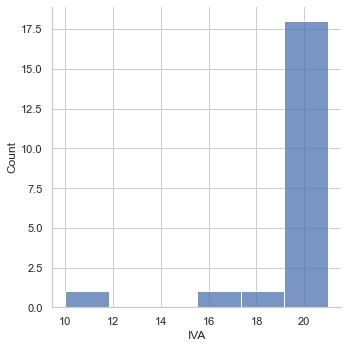

In [13]:
#CREACION DE GRAFICOS

#Cuenta facturas por IVA
sns.displot(df['IVA'])

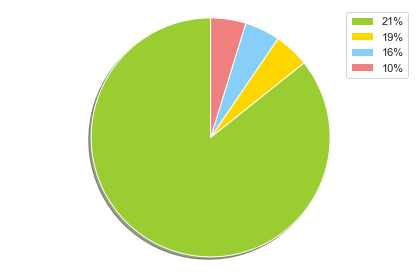

In [14]:
#Pie Chart IVA. Representación en quesito de lo mismo que la anterior
Grouped=pd.DataFrame()
Grouped["Cuenta"]=df['IVA'].value_counts()
Grouped


labels = ['21%', '19%', '16%', '10%']
sizes = Grouped['Cuenta']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


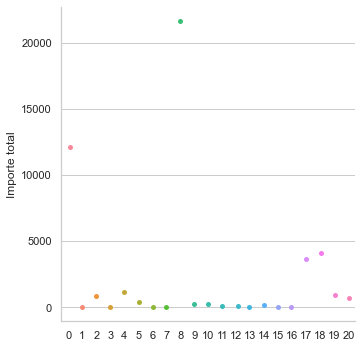

In [15]:
#Grafica con todos los importes totales donde en el eje X se refpresenta el indice de cada factura en el dataframe y en el eje y su correspondiente importe total.
sns.catplot(x=df.index, y="Importe total", data=df)

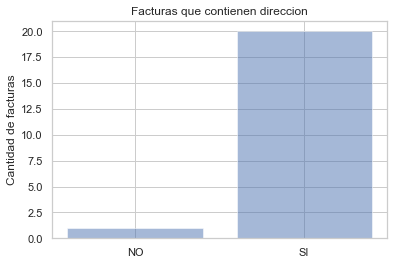

In [16]:
#En este gráfico se representan las facturas de las cuales se han extraido direccion la las que no.
a =  0
b = 0
for i in range(len(df.Dirección)):
    if (df.Dirección[i] == "Na"):
        a = a + 1
    else:
        b = b +  1
lista = [a,b]
objects = ('NO', 'SI')
y_pos = np.arange(len(objects))
performance = [a,b]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad de facturas')
plt.title('Facturas que contienen direccion')

plt.show()

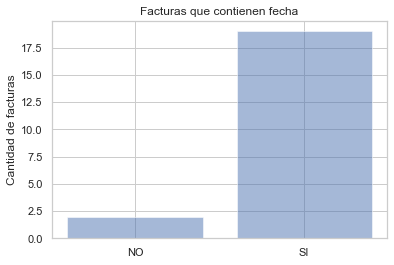

In [17]:
#En este gráfico se representan las facturas de las cuales se han extraido fecha y las que no.
a =  0
b = 0
for i in range(len(df.Fecha)):
    if (df.Fecha[i] == "Na"):
        a = a + 1
    else:
        b = b +  1
lista = [a,b]
objects = ('NO', 'SI')
y_pos = np.arange(len(objects))
performance = [a,b]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad de facturas')
plt.title('Facturas que contienen fecha')

plt.show()

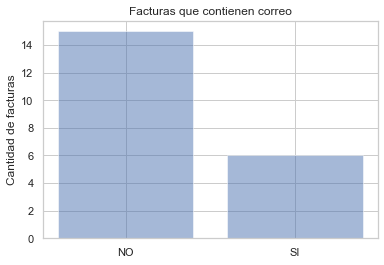

In [18]:
#En este gráfico se representan las facturas de las cuales se han extraido correo y las que no.
a =  0
b = 0
for i in range(len(df.Correo)):
    if (df.Correo[i] == "Na"):
        a = a + 1
    else:
        b = b +  1
lista = [a,b]
objects = ('NO', 'SI')
y_pos = np.arange(len(objects))
performance = [a,b]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad de facturas')
plt.title('Facturas que contienen correo')

plt.show()

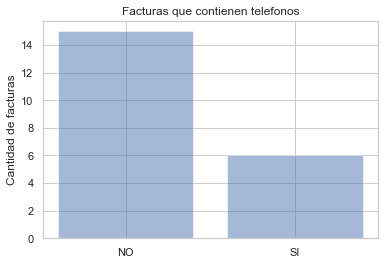

In [19]:
#En este gráfico se representan las facturas de las cuales se han extraido teléfonos y las que no.
a =  0
b = 0
for i in range(len(df.Telefono)):
    if (df.Telefono[i] == "Na"):
        a = a + 1
    else:
        b = b +  1
lista = [a,b]
objects = ('NO', 'SI')
y_pos = np.arange(len(objects))
performance = [a,b]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad de facturas')
plt.title('Facturas que contienen telefonos')

plt.show()

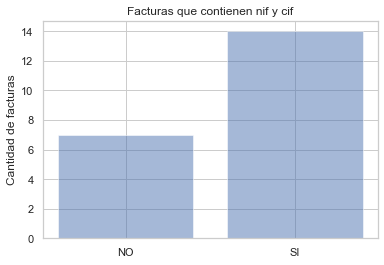

In [22]:
#En este gráfico se representan las facturas de las cuales se han extraido nif cif y las que no.
a =  0
b = 0
for i in range(len(df.NIF_CIF)):
    if (df.NIF_CIF[i] == "Na"):
        a = a + 1
    else:
        b = b +  1
lista = [a,b]
objects = ('NO', 'SI')
y_pos = np.arange(len(objects))
performance = [a,b]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad de facturas')
plt.title('Facturas que contienen nif y cif')

plt.show()